[![Open In colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaML/1_Vectores/Vectores.ipynb)

# Vectores


## Definición
Un vector es una cantidad definida por una magnitud y una dirección. Por ejemplo, la velocidad de un cohete es un vector tridimensional: su magnitud es la velocidad del cohete y su dirección es (con suerte) hacia arriba. Un vector se puede representar mediante una serie de números llamados *escalares*. Cada escalar corresponde a la magnitud del vector con respecto a cada dimensión.

Por ejemplo, supongamos que el cohete sube con un ligero ángulo: tiene una velocidad vertical de 5000 m/s, y también una ligera velocidad hacia el este de 10 m/s, y una ligera velocidad hacia el norte de 50 m/s. s. La velocidad del cohete se puede representar mediante el siguiente vector:

**velocidad** 
$= \begin{pmatrix}
10\\
50\\
5000
\end{pmatrix}$

Nota: por convención, los vectores generalmente se presentan en forma de columnas. Además, los nombres de los vectores suelen estar en minúsculas para distinguirlos de las matrices (de las que hablaremos más adelante) y en negrita (cuando sea posible) para distinguirlos de valores escalares simples como ${metros\_por\_segundo} = 5026$.

Una lista de N números también puede representar las coordenadas de un punto en un espacio N-dimensional, por lo que es bastante frecuente representar los vectores como simples puntos en lugar de flechas. Un vector con 1 elemento puede representarse como una flecha o un punto en un eje, un vector con 2 elementos es una flecha o un punto en un plano, un vector con 3 elementos es una flecha o un punto en el espacio y un vector con N elementos es una flecha o un punto en un espacio de N dimensiones... que a la mayoría de la gente le cuesta imaginar.


##  Propósito
Los vectores tienen muchos propósitos en el aprendizaje automático, sobre todo para representar observaciones y predicciones. Por ejemplo, supongamos que construimos un sistema de aprendizaje automático para clasificar videos en 3 categorías (bueno, spam, clickbait) según lo que sabemos sobre ellos. Para cada video, tendríamos un vector que representa lo que sabemos sobre él, como:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

Este vector podría representar un video que dura 10,5 minutos, pero solo el 5,2% de los espectadores miran más de un minuto, obtiene un promedio de 3,25 vistas por día y se marcó 7 veces como spam. Como puede ver, cada eje puede tener un significado diferente.

Según este vector, nuestro sistema de aprendizaje automático puede predecir que existe un 80 % de probabilidad de que sea un video no deseado, un 18 % de que sea clickbait y un 2 % de que sea un buen video. Esto podría representarse como el siguiente vector:

**probabilidades_de_clase** $= \begin{pmatrix}
0,80 \\
0.18 \\
0.02
\end{pmatrix}$

## Vectores en python
En python, un vector se puede representar de muchas maneras, la más simple es una lista de números de python normal:

In [19]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Dado que planeamos hacer una gran cantidad de cálculos científicos, es mucho mejor usar `ndarray` de NumPy, que proporciona muchas implementaciones convenientes y optimizadas de operaciones matemáticas esenciales en vectores (para obtener más detalles sobre NumPy, consulte [NumPy tutorial](tools_numpy.ipynb)). Por ejemplo:

In [20]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

El tamaño de un vector se puede obtener usando el atributo `size`:

In [21]:
video.size

4

El iésimo elemento (en la posición i) de un vector $\textbf{v}$ se anota como $\textbf{v}_i$.

Tenga en cuenta que los índices en matemáticas generalmente comienzan en 1, pero en programación generalmente comienzan en 0. Entonces, para acceder a $\textbf{video}_3$ programáticamente, escribiríamos:

In [22]:
video[2]  # 3rd element

3.25

## Graficar vectores
Para graficar vectores usaremos matplotlib, así que comencemos importándolo (para obtener detalles sobre matplotlib, consulte el [tutorial de matplotlib](tools_matplotlib.ipynb)):

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

### Vectores 2D
Vamos a crear un par de vectores 2D muy simples para graficar:

In [24]:
u = np.array([2, 5])
v = np.array([3, 1])

Cada uno de estos vectores tiene 2 elementos, por lo que se pueden representar gráficamente fácilmente en un gráfico 2D, por ejemplo, como puntos:

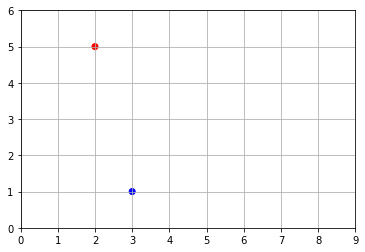

In [25]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Los vectores también se pueden representar como flechas. Vamos a crear una pequeña función de conveniencia para dibujar  flechas bonitas:

In [26]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Ahora dibujemos los vectores **u** y **v** como flechas:

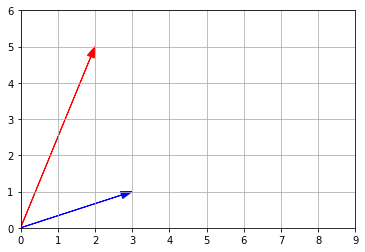

In [27]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Vectores 3D
Dibujar vectores 3D también es relativamente sencillo. Primero vamos a crear dos vectores 3D:

In [28]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Ahora vamos a trazarlos usando `Axes3D` de matplotlib:

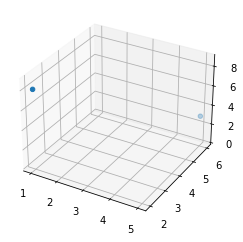

In [29]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Es un poco difícil visualizar exactamente dónde están estos dos puntos en el espacio, así que agreguemos algunas líneas verticales y horizontales. Crearemos una pequeña función de conveniencia para trazar una lista de vectores 3D con líneas verticales adjuntas:

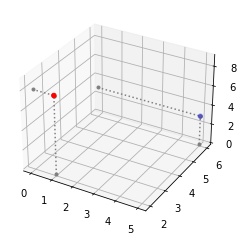

In [30]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
        ax.plot([0,x], [y,y], [z, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norma
La norma de un vector $\textbf{u}$, anotada $\left \Vert \textbf{u} \right \|$, es una medida de la longitud (también conocida como la magnitud) de $\textbf{u}$. Hay múltiples normas posibles, pero la más común (y la única que discutiremos aquí) es la norma euclidiana, que se define como:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Podríamos implementar esto fácilmente en Python puro, recordando que $\sqrt x = x^{\frac{1}{2}}$

In [31]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

Sin embargo, es mucho más eficiente usar la función `norm` de NumPy, disponible en el módulo `linalg` (**Lin**ear **Alg**ebra):

In [32]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

Tracemos un pequeño diagrama para confirmar que la longitud del vector $\textbf{v}$ es de hecho $\approx5.4$:

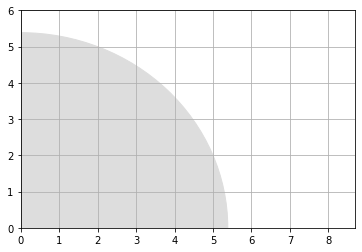

In [49]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="r")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

¡Se ve bien!

## Adición
Se pueden sumar vectores del mismo tamaño. La suma se realiza *elemento a elemento*:

In [53]:
w = np.array([4, 2])
print(" ", u)
print("+", v)
print("+", w)
print("-"*10)
u + v + w

  [2 5]
+ [3 1]
+ [4 2]
----------


array([9, 8])

Veamos cómo se ve gráficamente la suma de vectores:

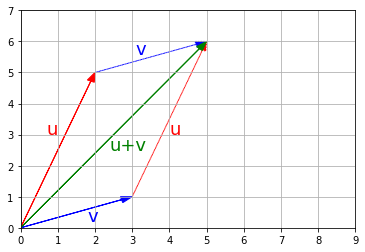

In [51]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

La suma de vectores es **conmutativa**, lo que significa que $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. Puedes verlo en la imagen anterior: siguiendo $\textbf{u}$ *luego* $\textbf{v}$ lleva al mismo punto que siguiendo $\textbf{v}$ *luego* $\textbf{u} $

La suma de vectores también es **asociativa**, lo que significa que $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{ w}$.

Si tiene un polígono definido por una cantidad de puntos (vectores) y suma un vector $\textbf{v}$ a todos estos puntos, entonces todo el polígono se desplaza $\textbf{v}$. Esto se llama [traslación geométrica](https://en.wikipedia.org/wiki/Translation_%28geometry%29):

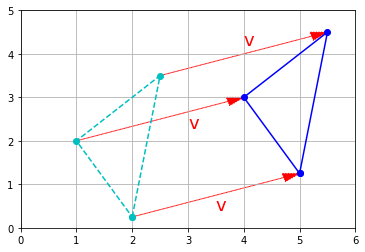

In [56]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

Finalmente, restar un vector es como sumar el vector opuesto.

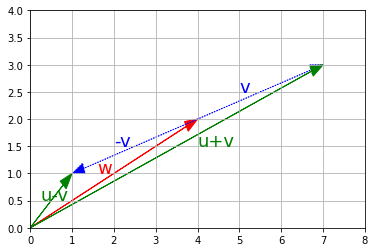

In [67]:
plot_vector2d(w, color="r")
plot_vector2d(v, origin=w, color="b", linestyle="dotted")
plot_vector2d(-v, origin=w, color="b", linestyle="dotted")
plot_vector2d(w+v, color="g")
plot_vector2d(w-v, color="g")
plt.axis([0, 8, 0, 4])
plt.text(1.6, 1, "w", color="r", fontsize=18)
plt.text(5, 2.5, "v", color="b", fontsize=18)
plt.text(2, 1.5, "-v", color="b", fontsize=18)
plt.text(4, 1.5, "u+v", color="g", fontsize=18)
plt.text(0.25, 0.5, "u-v", color="g", fontsize=18)
plt.grid()
plt.show()

## Multiplicación por un escalar
Los vectores se pueden multiplicar por escalares. Todos los elementos del vector se multiplican por ese número, por ejemplo:

In [70]:
result = 1.5 * u
print("1.5 *", u, "=", result)

1.5 * [2 5] = [3.  7.5]


Gráficamente, la multiplicación por escalar da como resultado cambiar la escala de una figura, de ahí el nombre *escalar*. La distancia desde el origen (el punto en coordenadas iguales a cero) también se multiplica por el escalar. Por ejemplo, ampliemos la escala por un factor de `k = 2.5`:

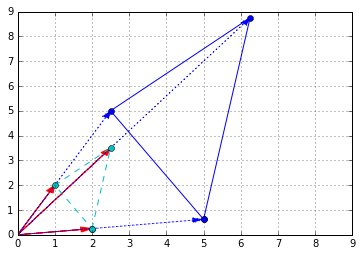

In [ ]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

Como puedes suponer, dividir un vector por un escalar es equivalente a multiplicar por su inverso multiplicativo:
$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

La multiplicación por escalar es **conmutativa**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

También es **asociativa**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finalmente, es **distributiva** sobre la suma de vectores: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{ v}$.

## Vectores nulos, unitarios y normalizados
* Un **vector nulo** es un vector lleno de ceros.
* Un **vector unitario** es un vector con una norma igual a 1.
* El **vector normalizado** de un vector no nulo $\textbf{u}$, anotado $\hat{\textbf{u}}$, es el vector unitario que apunta en la misma dirección que $\textbf{u}$. Es igual a: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$



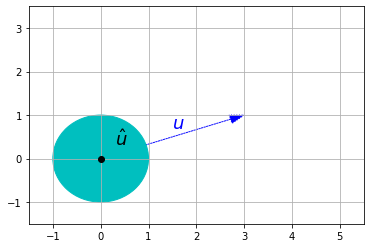

In [71]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Producto escalar
### Definición
El producto punto (también llamado *producto escalar*) de dos vectores $\textbf{u}$ y $\textbf{v}$ es una operación útil que surge con bastante frecuencia en álgebra lineal. Se anota $\textbf{u} \cdot \textbf{v}$, o a veces $⟨\textbf{u}|\textbf{v}⟩$ o $(\textbf{u}|\textbf{v}) $, y se define como:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

donde $\theta$ es el ángulo entre $\textbf{u}$ y $\textbf{v}$.

Otra forma de calcular el producto escalar es:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### En python
El producto punto es bastante simple de implementar:

In [72]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

Pero NumPy proporciona una implementación *mucho* más eficiente con la función `dot`:

In [73]:
np.dot(u,v)

11

De manera equivalente, puede usar el método `dot` de `ndarray`s:

In [74]:
u.dot(v)

11

**Precaución**: el operador `*` realizará una multiplicación *elemento a elemento*, *NO* un producto escalar:

In [75]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

### Propiedades principales
* El producto escalar es **conmutativo**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* El producto escalar solo se define entre dos vectores, no entre un escalar y un vector. Esto significa que no podemos encadenar productos punto: por ejemplo, la expresión $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ no está definida ya que $\textbf{u} \cdot \textbf{ v}$ es un escalar y $\textbf{w}$ es un vector.
* Esto también significa que el producto escalar **NO es asociativo**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{ v} \cdot \textbf{w})$ ya que ninguno está definido.
* Sin embargo, el producto escalar es **asociativo con respecto a la multiplicación escalar**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finalmente, el producto escalar es **distributivo** sobre la suma de vectores: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v } + \textbf{u} \cdot \textbf{w}$.

### Cálculo del ángulo entre vectores
Uno de los muchos usos del producto escalar es calcular el ángulo entre dos vectores no nulos. Mirando la definición del producto escalar, podemos deducir la siguiente fórmula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v } \right \|} \right ) }$

Tenga en cuenta que si $\textbf{u} \cdot \textbf{v} = 0$, se sigue que $\theta = \dfrac{π}{2}$. En otras palabras, si el producto escalar de dos vectores no nulos es cero, significa que son ortogonales.

Usemos esta fórmula para calcular el ángulo entre $\textbf{u}$ y $\textbf{v}$ (en radianes):

In [ ]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.868539395286 radians
      = 49.7636416907 degrees


Nota: debido a pequeños errores de coma flotante, `cos_theta` puede estar ligeramente fuera del intervalo $[-1, 1]$, lo que haría que `arccos` fallara. Es por eso que recortamos el valor dentro del rango, usando la función `clip` de NumPy.

### Proyectar un punto sobre un eje
El producto escalar también es muy útil para proyectar puntos en un eje. La proyección del vector $\textbf{v}$ sobre el eje de $\textbf{u}$ viene dada por esta fórmula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Lo cual es equivalente a:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$



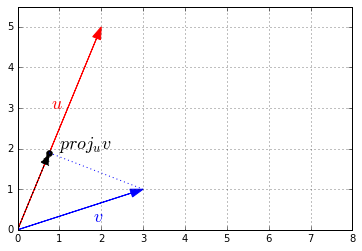

In [ ]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

# Ejemplo: Social Listening

Con esta herramienta podemos buscar los últimos N tweets de un usuario O de un hashtag, ver en qué temas se agrupan.

Instrucciones:

- Darle play a la primera celda
- Resetear: en el menu, elegir Runtime -> Restart runtime
- Poner los parámetros que se quieran (usuario y cantidad de tweets) y ejecutar!

Aclaración: puede tardar unos ~2-5 minutos, en especial la primera vez que se ejecuta.)

In [ ]:
#@title Darle play a esta celda y cuando termina, clickear en el menú "Runtime" o "Entorno de Ejecución" y "Restart Runtime" o "Reiniciar entorno de ejecución"  
%%capture
# Instalamos twint para bajar tweets
!pip3 install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks
!pip install tweet-preprocessor
!pip install umap-learn
!pip install sentence_transformers
!pip install hdbscan
!pip install transformers

In [ ]:
buscar_por = "usuario"  # @param ["usuario", "hashtag"]
usuario = "UniversidadC"  # @param {type:"string"}
hashtag = ""  # @param {type:"string"}
desde = "2019-01-01"  # @param {type:"date"}
desde = desde + ' 00:00:00'
idioma = "es"  # @param ["en", "es"]
n = 1000  # @param {type:"integer"}
download_csv = False  

if idioma == "es":
    sentiment_model = "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
elif idioma == "en":
    sentiment_model = "distilbert-base-uncased-finetuned-sst-2-english"
else:
    sentiment_model = "nlptown/bert-base-multilingual-uncased-sentiment"

import time
import re
import textwrap
import hdbscan
import nest_asyncio
import numpy as np
import seaborn as sns

# Hay que reiniciar la colab. Luego de eso, importamos
import twint
import umap
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pandas as pd
import plotly.graph_objects as go
import preprocessor as p

from transformers import pipeline
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud
from IPython.utils import io

nest_asyncio.apply()
pd.options.mode.chained_assignment = None
now = time.strftime("%Y-%m-%d %H:%M:%S")

def make_cloud(text, img_url=None, width=800, height=800, plot=True, min_font_size=10):
    mask = None

    if img_url:
        mask = np.array(Image.open(BytesIO(rq.get(img_url).content)))
        mask[mask > 250] = 255
        image_colors = ImageColorGenerator(mask)
        width = mask.shape[1]
        height = mask.shape[0]

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color="white",
        stopwords=stopwords,
        random_state=42,
        min_font_size=min_font_size,
        mask=mask,
        color_func=image_colors if img_url else None,
    ).generate(text)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

    return wordcloud

def c_tf_idf(documents, m, ngram_range=(1, 1), stop_words="spanish"):
    count = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(
        documents
    )
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count


def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.cluster)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {
        label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1]
        for i, label in enumerate(labels)
    }
    return top_n_words


def plot_clusters(all_coords: pd.DataFrame, clusters):
    """all_coords should have title, text, cluster, and color cols. Constructed like:

    all_coords = pd.DataFrame(data = reduced, columns = ['x', 'y','z'])
    all_coords['title'] = labels
    all_coords['text'] = data
    all_coords['cluster'] = clusters"""
    fig = go.Figure()

    # Group titles and get top N words per cluster
    docs_per_topic = all_coords.groupby(["cluster"], as_index=False).agg(
        {"text": " ".join}
    )
    tf_idf, count = c_tf_idf(docs_per_topic.text.values, m=len(clusters), stop_words=[])
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=15)
    # pprint({k: [w for w,r in v] for k,v in top_n_words.items()}, compact=True)

    # @title 3D Plot
    max_labels = 3
    words_per_cluster = {
        n: [p for p, score in l[:max_labels]] for n, l in top_n_words.items()
    }

    # Clusters
    for c in np.unique(clusters):
        coords = all_coords[all_coords.cluster == c]
        fig.add_trace(
            go.Scatter3d(
                x=coords["x"],
                y=coords["y"],
                z=coords["z"],
                mode="markers",
                marker_size=8,
                marker_line_width=1,
                name=f"Cº{str(c)}: {'<br>'.join(textwrap.wrap(' '.join(words_per_cluster[c]), width=50))}",
                marker_color=coords["color"],
                text=coords["text"].apply(
                    lambda txt: "<br>".join(textwrap.wrap(txt, width=50))
                ),
                hoverinfo="text",
            )
        )
    return fig


def get_hashtag(hashtag, until=now, since=desde, n=None):
    c = twint.Config()
    c.Profile_full = True
    c.Pandas = True
    c.Search = hashtag
    c.Show_hashtags = True
    c.Until = until
    c.Since = since
    c.Count = True
    c.Retweets = True
    c.Hide_output = True
    if n:
        c.Limit = n

    c.Store_csv = True
    c.Output = until + " to " + since + ".csv"

    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets


def get_user(user, until=now, since=desde, n=None):
    # Descargamos tweets
    c = twint.Config()
    c.Username = user
    c.Until = until
    c.Since = since
    c.Hide_output = True
    c.Pandas = True
    if n:
        c.Limit = n
    twint.run.Search(c)
    tweets = twint.output.panda.Tweets_df[["date", "tweet", "hashtags"]]
    return tweets

print("Descargando Tweets...")

if buscar_por == "usuario":
    func = get_user
    query = usuario
else:
    func = get_hashtag
    query = hashtag

tweets = func(query, n=n)
print(f'Got {tweets.shape[0]} tweets')
if download_csv:
    # Descargar csv a local
    tweets.to_csv(f"{user}.csv")
    from google.colab import files

    files.download(f"{user}.csv")
  

print("Despertando IAs...")
with io.capture_output() as captured:
    sentence_transformers_model = (
        "sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking"
    )
    model = SentenceTransformer(sentence_transformers_model)
    #get_sentiment = pipeline("sentiment-analysis", model=sentiment_model)

print("Procesando...")
tweets["tweet"] = tweets.apply(lambda x: p.clean(x["tweet"]), axis=1)

# Por tweets iguales con distintas URLs
tweets = tweets.drop_duplicates("tweet")
tweets = tweets.loc[(tweets["tweet"].str.len() > 1), :]

embeddings = model.encode(tweets["tweet"].tolist())
reducer = umap.UMAP(n_components=3).fit(embeddings)
umap_embeddings = reducer.transform(embeddings)
cluster = hdbscan.HDBSCAN().fit(umap_embeddings)

data = tweets["tweet"].tolist()
clusters = cluster.labels_

all_coords = pd.DataFrame(data=umap_embeddings, columns=["x", "y", "z"])
all_coords["text"] = data
all_coords["cluster"] = clusters

# for style in ['YlGnBu']:
style = "viridis_r"
# We generate a list of colors
palette = sns.color_palette(style, n_colors=len(np.unique(clusters)) + 1).as_hex()
all_coords["color"] = [palette[i] for i in clusters]

fig = plot_clusters(all_coords, clusters)
fig.update_layout(
    width=1000,
    height=800,
    autosize=False,
    showlegend=True,
    scene={"aspectmode": "cube"},
)
fig.show()

In [ ]:
#@title Word Cloud
img_url = "https://toppng.com/uploads/preview/human-brain-png-high-quality-image-brain-clipart-115630224411rqb2dvotv.png"
text = " ".join(twint.output.panda.Tweets_df["tweet"].tolist())
make_cloud(text, img_url);

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/tweets_uccuyo.csv')

In [ ]:
df.head()